# 01 Post process turbine simulation
## -- Flow Field --

In [4]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as ncdf
import pandas as pd
import os

In [5]:
from moa_python.post_plane import Post_plane

## Case with OpenFAST turbine

In [6]:
case_folder = '/projects/ssc/jfrederi/amr-wind-runs/precursor-reverted/baseline_8ms'
hor_plane_file = 'post_processing/samplingPlane14400.nc'
ver_plane_file = 'post_processing/samplingSlice14400.nc'

### Horizontal plane

In [7]:
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file)
hor_plane = Post_plane(full_filename_hor_plane, origin = [480,480,0])

## Turbine parameters
D = 240
hub_height = 150
t = 10000
overhang = 12.0313
x0 = 2*D
y0 = 2*D

# Set origin and scale to rotor diameter
hor_plane.set_origin(x = x0, y = y0)
hor_plane.scale_to_rot_diam(D)

Plane has 1 plane(s) in 361 time steps from 7200.0 to 10799.999999965657
Plane offsets: [150.]


Plotting u velocity for plane at location 0.625 at time 10000
Nearest point to 0.625 is 0.625
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 0.625 at time 9999.999999977299


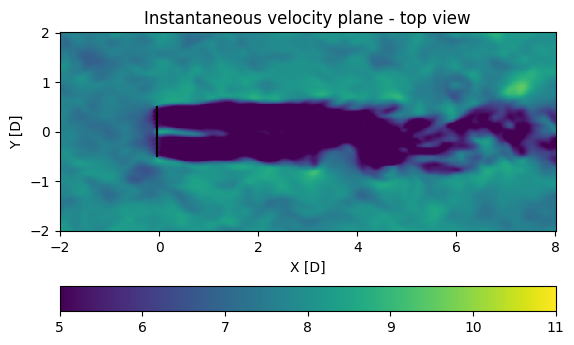

In [8]:
ax = hor_plane.plot_plane(z = hub_height/D, time = t, vmin=5., vmax=11.)
ax.set_title("Instantaneous velocity plane - top view");
hor_plane.plot_turbine(turb_loc = [-overhang/D,0])

Plotting u mean velocity for plane at location 0.625
Nearest point to 0.625 is 0.625
Returning u mean velocity plane for slice at 0.625
Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657


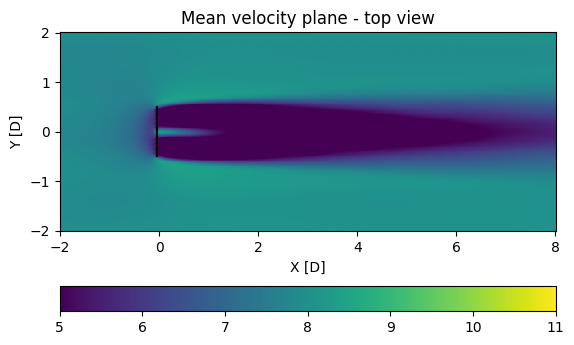

In [9]:
timespan = [9000, 10800]

ax = hor_plane.plot_mean_plane(z = hub_height/D, timespan = timespan, vmin=5., vmax=11.)
ax.set_title("Mean velocity plane - top view");
hor_plane.plot_turbine(turb_loc = [-overhang/D,0])

### Vertical plane

In [10]:
full_filename_slice = os.path.join(case_folder,ver_plane_file)
ver_plane = Post_plane(full_filename_slice)

# Set origin and scale to rotor diameter
ver_plane.set_origin(center='x')
ver_plane.scale_to_rot_diam(D)

Plane has 4 plane(s) in 361 time steps from 7200.0 to 10799.999999965657
Plane offsets: [   0.  720. 1200. 1680.]


Plotting u velocity for plane at location 0.0 at time 10000
Nearest point to 0.0 is 0.0
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 0.0 at time 9999.999999977299
Plotting u velocity for plane at location 3.0 at time 10000
Nearest point to 3.0 is 3.0
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 3.0 at time 9999.999999977299
Plotting u velocity for plane at location 5.0 at time 10000
Nearest point to 5.0 is 5.0
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 5.0 at time 9999.999999977299
Plotting u velocity for plane at location 7.0 at time 10000
Nearest point to 7.0 is 7.0
Nearest time to 10000 is 9999.999999977299
Returning u velocity plane for slice at 7.0 at time 9999.999999977299


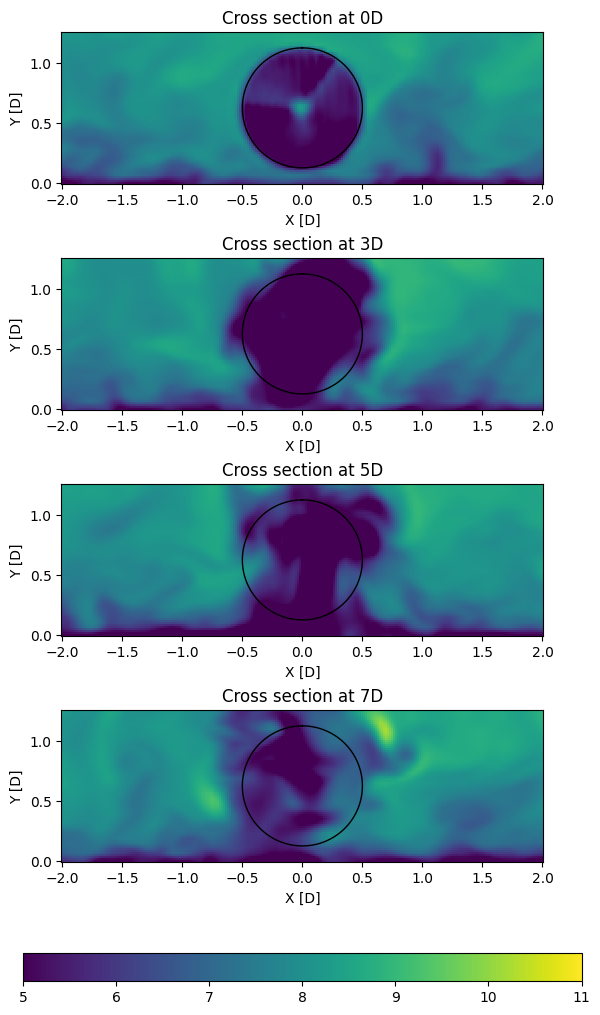

In [11]:
fig,ax = plt.subplots(ver_plane.z_N, 1, figsize = (6,10), constrained_layout = True)
for n in range(ver_plane.z_N):
    ax[n] = ver_plane.plot_plane(ver_plane.z[n], t, ax = ax[n], vmin=5., vmax=11.)
    ver_plane.plot_turbine(turb_loc = [0, hub_height/D], plane = 'yz')
    ax[n].set_title(f'Cross section at {int(ver_plane.z[n])}D')
    im = [obj for obj in ax[n].get_children() if isinstance(obj, mpl.collections.Collection)][0]
    if im:
        im.colorbar.remove()
fig.colorbar(im,ax=ax,location='bottom')

Plotting u mean velocity for plane at location 0.0
Nearest point to 0.0 is 0.0
Returning u mean velocity plane for slice at 0.0
Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657
Plotting u mean velocity for plane at location 3.0
Nearest point to 3.0 is 3.0
Returning u mean velocity plane for slice at 3.0
Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657
Plotting u mean velocity for plane at location 5.0
Nearest point to 5.0 is 5.0
Returning u mean velocity plane for slice at 5.0
Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657
Plotting u mean velocity for plane at location 7.0
Nearest point to 7.0 is 7.0
Returning u mean velocity plane for slice at 7.0
Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657


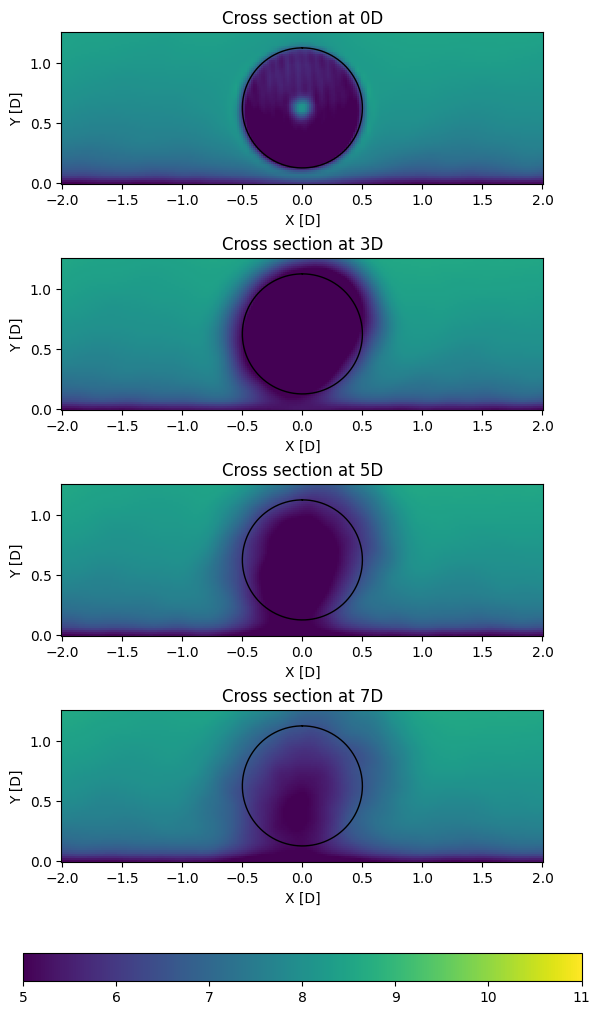

In [12]:
fig,ax = plt.subplots(ver_plane.z_N, 1, figsize = (6,10), constrained_layout = True)
for n in range(ver_plane.z_N):
    ax[n] = ver_plane.plot_mean_plane(ver_plane.z[n], timespan = timespan, ax = ax[n], vmin=5., vmax=11.)
    ver_plane.plot_turbine(turb_loc = [0, hub_height/D], plane = 'yz')
    ax[n].set_title(f'Cross section at {int(ver_plane.z[n])}D')
    im = [obj for obj in ax[n].get_children() if isinstance(obj, mpl.collections.Collection)][0]
    if im:
        im.colorbar.remove()
fig.colorbar(im,ax=ax,location='bottom')

## Velocity in wake

Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657
Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657
Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657
Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657
Nearest time to 9000 is 8999.999999991851
Nearest time to 10800 is 10799.999999965657


Text(0.5, 1.0, 'Velocity in the wake')

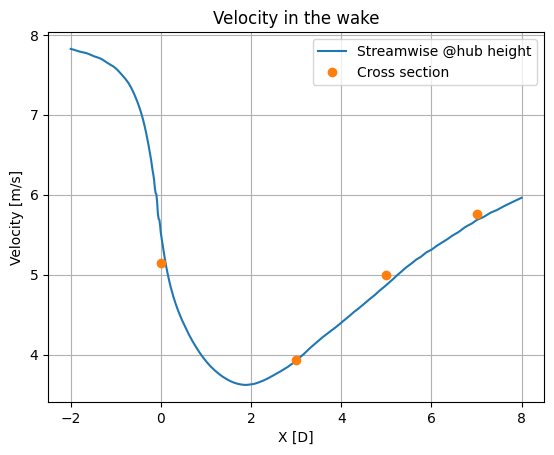

In [15]:
fig_wake, ax_wake = plt.subplots()

hor_plane.plot_vel_in_wake(radius = 1/2, turb_loc = [0, 0, 150/D], \
                           z= 150/D, timespan=[9000,10800], ax = ax_wake, verbose = 0)
ver_plane.plot_vel_in_wake(radius = 1/2, turb_loc = [0, 150/D, 0], \
                           timespan = [9000, 10800], axis='z', ax = ax_wake, linestyle = 'o', verbose = 0)
ax_wake.legend(['Streamwise @hub height','Cross section'])
ax_wake.set_title('Velocity in the wake')